In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class make_crossSections:
    #units in GeV, cm^2
    
    def __init__(self): 
        self.cs_nu_mu_cc_n = np.loadtxt("nu_cross_sections/nu_mu_H2_cc_n.txt", dtype=float)
        self.cs_nu_mu_cc_p = np.loadtxt("nu_cross_sections/nu_mu_H2_cc_p.txt", dtype=float)
        self.cs_nu_mu_bar_cc_n = np.loadtxt("nu_cross_sections/nu_mu_bar_H2_cc_n.txt", dtype=float)
        self.cs_nu_mu_bar_cc_p = np.loadtxt("nu_cross_sections/nu_mu_bar_H2_cc_p.txt", dtype=float)
        
    def get_cs_nu_mu_cc_n(self, energy):
        return np.interp(energy, self.cs_nu_mu_cc_n[:,0], self.cs_nu_mu_cc_n[:,1]*1e-38)
    def get_cs_nu_mu_cc_p(self, energy):
        return np.interp(energy, self.cs_nu_mu_cc_p[:,0], self.cs_nu_mu_cc_p[:,1]*1e-38)
    def get_cs_nu_mu_bar_cc_n(self, energy):
        return np.interp(energy, self.cs_nu_mu_bar_cc_n[:,0], self.cs_nu_mu_bar_cc_n[:,1]*1e-38)
    def get_cs_nu_mu_bar_cc_p(self, energy):
        return np.interp(energy, self.cs_nu_mu_bar_cc_p[:,0], self.cs_nu_mu_bar_cc_p[:,1]*1e-38)

    def get_cs_nu_mu_cc_Fe56(self, energy): 
        return 30*self.get_cs_nu_mu_cc_n(energy) + 26*self.get_cs_nu_mu_cc_p(energy)
    def get_cs_nu_mu_bar_cc_Fe56(self, energy): 
        return 30*self.get_cs_nu_mu_bar_cc_n(energy) + 26*self.get_cs_nu_mu_bar_cc_p(energy)

In [29]:
cs_nu_mu_cc_n = np.loadtxt("nu_cross_sections/nu_mu_H2_cc_n.txt", dtype=float)
cs_nu_mu_cc_p = np.loadtxt("nu_cross_sections/nu_mu_H2_cc_p.txt", dtype=float)
cs_nu_mu_bar_cc_n = np.loadtxt("nu_cross_sections/nu_mu_bar_H2_cc_n.txt", dtype=float)
cs_nu_mu_bar_cc_p = np.loadtxt("nu_cross_sections/nu_mu_bar_H2_cc_p.txt", dtype=float)

In [15]:
cs_nu_mu_cc_n[:,1] = cs_nu_mu_cc_n[:,1]*1e-38

### make cross sections for each nuclei we care about

In [38]:
#fe56
A = 56
Z = 26
cs_nu_mu_cc_Fe56 = cs_nu_mu_cc_n.copy()
cs_nu_mu_bar_cc_Fe56 = cs_nu_mu_bar_cc_n.copy()

cs_nu_mu_cc_Fe56[:,1] = ( cs_nu_mu_cc_n[:,1]*(A-Z) + cs_nu_mu_cc_p[:,1]*Z )*1e-38
cs_nu_mu_bar_cc_Fe56[:,1] = ( cs_nu_mu_bar_cc_n[:,1]*(A-Z) + cs_nu_mu_bar_cc_p[:,1]*Z )*1e-38

np.savetxt("nu_cross_sections/nu_mu_cc_Fe56.txt", cs_nu_mu_cc_Fe56, delimiter=" ")
np.savetxt("nu_cross_sections/nu_mu_bar_cc_Fe56.txt", cs_nu_mu_bar_cc_Fe56, delimiter=" ")

In [39]:
#o16
A = 16
Z = 8
cs_nu_mu_cc_O16 = cs_nu_mu_cc_n.copy()
cs_nu_mu_bar_cc_O16 = cs_nu_mu_bar_cc_n.copy()

cs_nu_mu_cc_O16[:,1] = ( cs_nu_mu_cc_n[:,1]*(A-Z) + cs_nu_mu_cc_p[:,1]*Z )*1e-38
cs_nu_mu_bar_cc_O16[:,1] = ( cs_nu_mu_bar_cc_n[:,1]*(A-Z) + cs_nu_mu_bar_cc_p[:,1]*Z )*1e-38

np.savetxt("nu_cross_sections/nu_mu_cc_O16.txt", cs_nu_mu_cc_O16, delimiter=" ")
np.savetxt("nu_cross_sections/nu_mu_bar_cc_O16.txt", cs_nu_mu_bar_cc_O16, delimiter=" ")

In [40]:
#Si28
A = 28
Z = 14
cs_nu_mu_cc_Si28 = cs_nu_mu_cc_n.copy()
cs_nu_mu_bar_cc_Si28 = cs_nu_mu_bar_cc_n.copy()

cs_nu_mu_cc_Si28[:,1] = ( cs_nu_mu_cc_n[:,1]*(A-Z) + cs_nu_mu_cc_p[:,1]*Z )*1e-38
cs_nu_mu_bar_cc_Si28[:,1] = ( cs_nu_mu_bar_cc_n[:,1]*(A-Z) + cs_nu_mu_bar_cc_p[:,1]*Z )*1e-38

np.savetxt("nu_cross_sections/nu_mu_cc_Si28.txt", cs_nu_mu_cc_Si28, delimiter=" ")
np.savetxt("nu_cross_sections/nu_mu_bar_cc_Si28.txt", cs_nu_mu_bar_cc_Si28, delimiter=" ")

In [41]:
#N14
A = 14
Z = 7
cs_nu_mu_cc_N14 = cs_nu_mu_cc_n.copy()
cs_nu_mu_bar_cc_N14 = cs_nu_mu_bar_cc_n.copy()

cs_nu_mu_cc_N14[:,1] = ( cs_nu_mu_cc_n[:,1]*(A-Z) + cs_nu_mu_cc_p[:,1]*Z )*1e-38
cs_nu_mu_bar_cc_N14[:,1] = ( cs_nu_mu_bar_cc_n[:,1]*(A-Z) + cs_nu_mu_bar_cc_p[:,1]*Z )*1e-38

np.savetxt("nu_cross_sections/nu_mu_cc_N14.txt", cs_nu_mu_cc_N14, delimiter=" ")
np.savetxt("nu_cross_sections/nu_mu_bar_cc_N14.txt", cs_nu_mu_bar_cc_N14, delimiter=" ")

## From LI-v2 code

In [8]:
mu_alpha = 1.76666667e-3
mu_beta = 2.0916666667e-6
tau_alpha = 1.473684210526e1
tau_beta = 2.6315789473684212e-7
def mu_range(energy):
    return np.log(1.0 + energy * mu_beta / mu_alpha) / mu_beta
def tau_range(energy):
    return (np.log(1.0 + energy * mu_beta / mu_alpha) / mu_beta) + (np.log(1.0 + energy * tau_beta / tau_alpha) / tau_beta)

Text(0, 0.5, 'Range (g/cm2)')

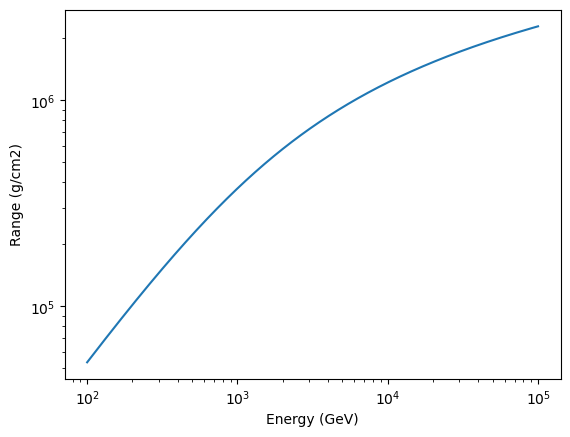

In [9]:
energyrange = np.logspace(np.log10(1e2), np.log10(1e5), 10000)
mu_range1 = mu_range(energyrange)
tau_range1 = tau_range(energyrange)

plt.plot(energyrange, mu_range1)
#plt.plot(energyrange, tau_range1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Range (g/cm2)')

In [10]:
0.212 / 1.2 

0.17666666666666667

In [11]:
(0.251e-3)/1.2 

0.00020916666666666666

## From LI-publication

In [12]:
da = 0.212 / 1.2
db = (0.251e-3)/1.2

def R_mu(energy):
    return (1/db)*np.log(1+energy*(db/da))
def R_tau(energy):
    return (1/db)*np.log(1+energy*(db/da)) + (3.8e4)*np.log(1+1/(5.6e7))

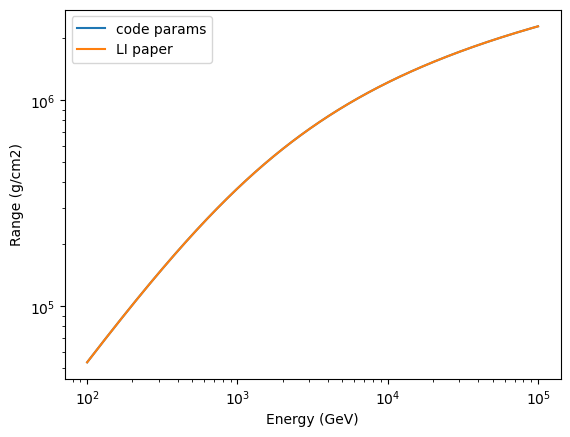

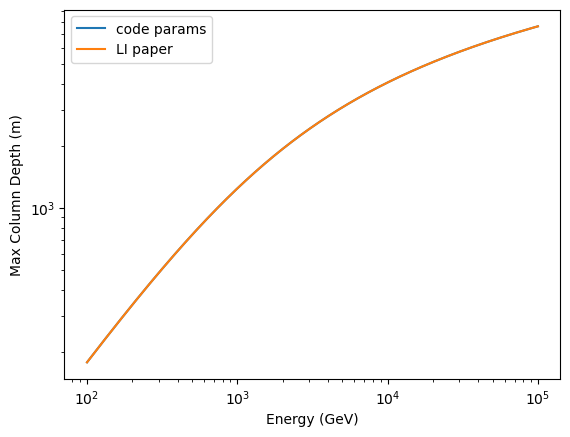

In [13]:
energyrange = np.logspace(np.log10(1e2), np.log10(1e5), 10000)
mu_range2 = R_mu(energyrange)
tau_range2 = R_tau(energyrange)

plt.figure()
plt.plot(energyrange, mu_range1, label='code params')
#plt.plot(energyrange, tau_range1/ 3 / 100)
plt.plot(energyrange, mu_range2*100, label='LI paper')
#plt.plot(energyrange, tau_range2*100/ 3 / 100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Range (g/cm2)')
plt.legend()

plt.figure()
plt.plot(energyrange, mu_range1 / 3 / 100, label='code params')
#plt.plot(energyrange, tau_range1/ 3 / 100)
plt.plot(energyrange, mu_range2*100 / 3 / 100, label='LI paper')
#plt.plot(energyrange, tau_range2*100/ 3 / 100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Max Column Depth (m)')
plt.legend()